## Demonstration of Bivariate Gradient Descent

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook illustrates the Gradient Descent algorithm at the example of finding the global minimum of a convex bivariate function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The [Jupyter interactive widgets framework](https://github.com/matplotlib/ipympl) `ipympl` provides means for interactive visualization of the two-dimensional function. This may require the installation of the `ipympl` package using e.g. conda or pip. Uncomment the following  [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) if the package is installed and you want to use the interactive plotting features.

In [2]:
# %matplotlib widget

### Definition of Function and its Gradient

Lets define a convex polynomial bivariate function and its gradient

In [3]:
def function(theta):
    return (theta[0, :]-2)**2 + 2 * theta[1, :]**2 + 1


def gradient(theta):
    return np.array((2*theta[0]-4, 4*theta[1]))

For the sake of illustration the function is plotted

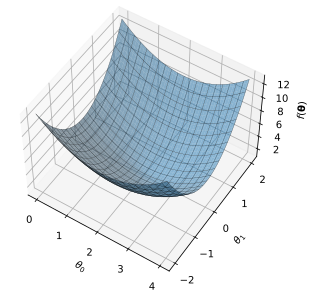

In [4]:
def plot_function():

    theta1 = np.linspace(0, 4, 100)
    theta2 = np.linspace(-2, 2, 100)
    T1, T2 = np.meshgrid(theta1, theta2)
    Z = function(np.array((T1, T2)))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    ax.plot_surface(T1, T2, Z, antialiased=True,
                    alpha=.5, zorder=-10, color='C0')
    ax.plot_wireframe(T1, T2, Z, rstride=5, cstride=5,
                      color='black', linewidth=.2)

    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'$f(\mathbf{\theta})$')

    ax.view_init(elev=51, azim=-57)

    return ax, T1, T2


plot_function();

### Finding Local Minimum using Gradient Descent

First a function is defined which implements the Gradient descent iteration

In [5]:
def gradient_descent(gradient, theta_0, lr=0.01, max_iter=100, tol=1e-6):

    theta_min = theta_0.copy()
    history = list()
    history.append(theta_0.copy())

    for _ in range(max_iter):
        delta = -lr * gradient(theta_min)
        if np.linalg.norm(delta) <= tol:
            break
        theta_min += delta
        history.append(theta_min.copy())

    return np.array(history)

In [6]:
history = gradient_descent(gradient, np.array([0.5,2.0]), lr=0.2, max_iter=1000, tol=1e-6)

print('Estimated (local) minimum is at {}'.format(history[-1]))

Estimated (local) minimum is at [1.99999846e+00 2.68435456e-19]


Lets illustrate the convergence of the algorithm by plotting the result of the individual iterations in parameter space together with the function values

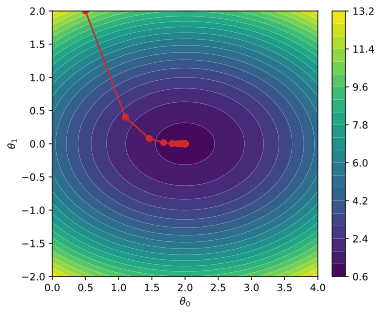

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

theta1 = np.linspace(0, 4, 100)
theta2 = np.linspace(-2, 2, 100)
T1, T2 = np.meshgrid(theta1, theta2)
Z = function(np.array((T1, T2)))

cf_ = ax.contourf(T1, T2, Z, 20)
fig.colorbar(cf_, fraction=0.046, pad=0.04)
ax.scatter(history[:, 0], history[:, 1], c='C3', marker='o')
ax.plot(history[:, 0], history[:, 1], color='C3')

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_aspect('equal')

As alternative visualisation of the convergence, the results of the individual iterations are plotted onto the function

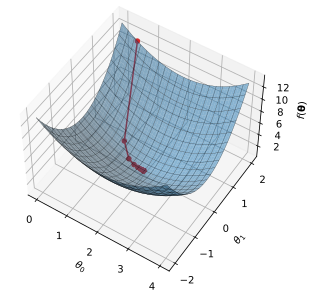

In [8]:
ax, T1, T2 = plot_function()

ax.plot(history[:, 0], history[:, 1], function(
    history.T), color='C3', zorder=0, alpha=1)
ax.scatter(history[:, 0], history[:, 1], function(
    history.T), c='C3', marker='o', alpha=1, zorder=0)

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$f(\mathbf{\theta})$')

ax.view_init(elev=51, azim=-57)

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.